In [3]:
from data_loader import get_dataset
state = get_dataset(url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/state.csv",
                    file_name="state")

In [4]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [5]:
import pandas as pd 
from scipy.stats import trim_mean

In [6]:
print(state['Population'].mean())
print(trim_mean(state['Population'] ,0.1)) #omitting 10% of data
print(state['Population'].median())

6162876.3
4783697.125
4436369.5


In [7]:
import numpy as np


In [8]:
print(np.average(state['Murder.Rate'] , weights=state['Population'])
)
#weigthed average

4.445833981123393


In [9]:
import wquantiles 
print(f"The weighted median of Murder rate with population as weight is {wquantiles.median(state['Murder.Rate'] , weights = state['Population'])}")

The weighted median of Murder rate with population as weight is 4.4


In [10]:
from statsmodels import robust
print(f"The Standard Deviation is {state['Population'].std()}")
print(f"IQR {state['Population'].quantile(.75) - state['Population'].quantile(.25)}")
print(f"Median Absolute Deviationis {robust.scale.mad(state['Population'])}")

The Standard Deviation is 6848235.347401142
IQR 4847308.0
Median Absolute Deviationis 3849876.1459979336


In [11]:
state['Murder.Rate'].quantile([0.05 , 0.25 , 0.5 , 0.75  , 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

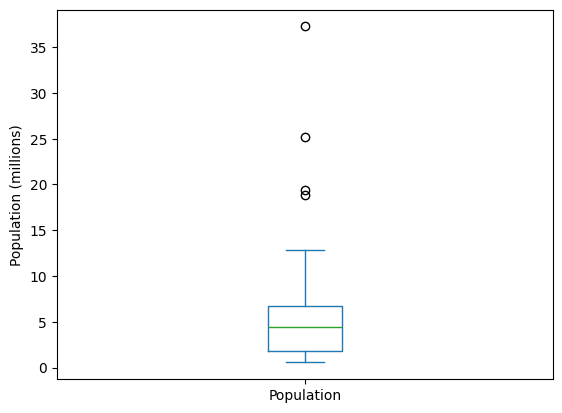

In [12]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel("Population (millions)")

In [13]:
binnedPopulation = pd.cut(state['Population'] , 10)
pd.DataFrame(binnedPopulation.value_counts())

,count
Population,
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0


Text(0.5, 0, 'Population (millions)')

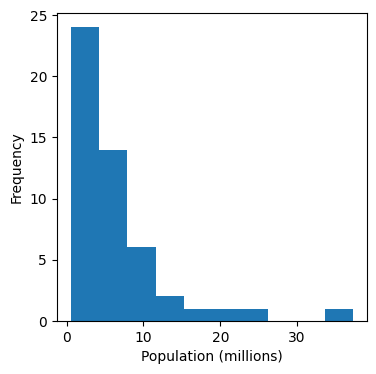

In [14]:
ax = (state['Population']/1_000_000).plot.hist(figsize =( 4 , 4))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

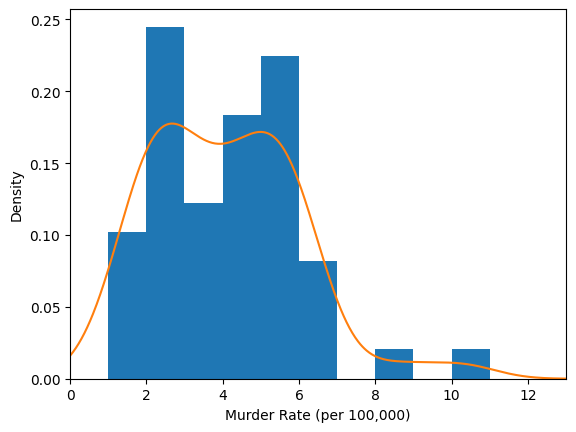

In [15]:
ax = state['Murder.Rate'].plot.hist(density = True , xlim = [0 ,13] , bins = range(1 , 12))
state['Murder.Rate'].plot.density(ax = ax)
ax.set_xlabel("Murder Rate (per 100,000)")

In [16]:
dfw = get_dataset(url="https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/dfw_airline.csv",
                  file_name="dfw")
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

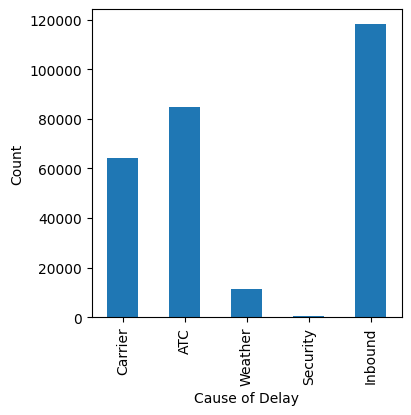

In [17]:
ax = dfw.transpose().plot.bar(figsize=(4 , 4) , legend = False)
ax.set_xlabel("Cause of Delay")
ax.set_ylabel("Count")

In [26]:
corr_matrix = state[['Population' , 'Murder.Rate']].corr()

In [24]:
import seaborn as sns

<Axes: >

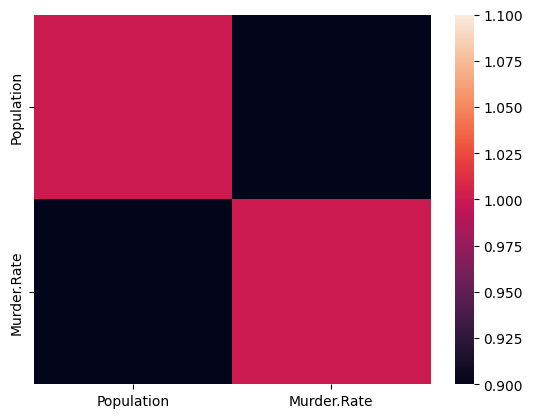

In [ ]:
sns.heatmap(corr_matrix)

Text(0, 0.5, 'Murder Rate (per 1_00_000)')

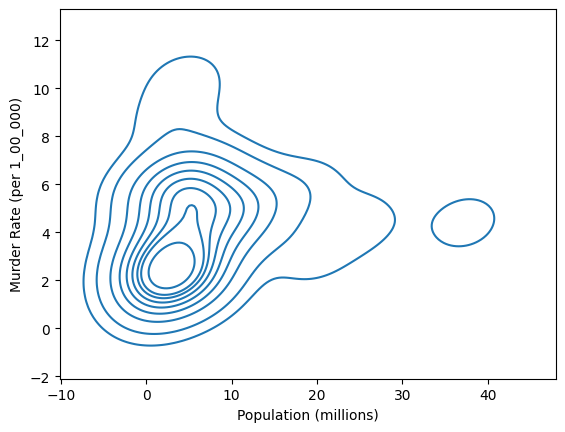

In [30]:
ax = sns.kdeplot(x = state['Population']/1_000_000 ,
                 y = state["Murder.Rate"] , 
                 data=state)
ax.set_xlabel("Population (millions)")
ax.set_ylabel("Murder Rate (per 1_00_000)")

Text(0, 0.5, 'Murder Rate (per 1_00_000)')

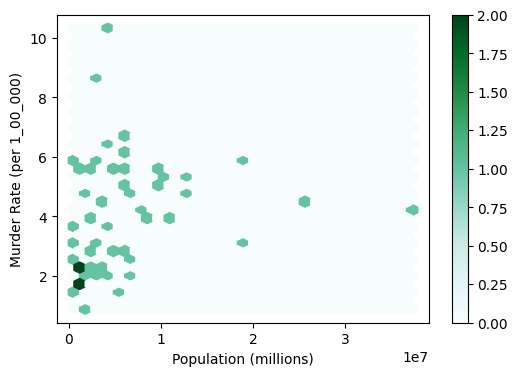

In [ ]:
ax = state.plot.hexbin(x = 'Population',
                 y = "Murder.Rate" , 
                 gridsize=30 , 
                 sharex = False , 
                 figsize= (6 , 4)
                 )
ax.set_xlabel("Population (millions)")
ax.set_ylabel("Murder Rate (per 1_00_000)")

In [34]:
lc_loans = get_dataset(url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/lc_loans.csv",
                       file_name="lc_loans")
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [40]:
crosstab = lc_loans.pivot_table(index = 'grade' , columns='status', 
                                aggfunc=lambda x: len(x) , 
                                margins = True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [43]:
df = crosstab.loc['A':'G' , :].copy()
df.loc[: , 'Charged Off': 'Late'] = df.loc[: , "Charged Off" : "Late"].div(df['All'] , axis=0)
df

C:\Users\A C E R\AppData\Local\Temp\ipykernel_16500\1499895201.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0215478  0.04005439 0.04982834 0.06740983 0.08165728 0.1182579
 0.12619562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[: , 'Charged Off': 'Late'] = df.loc[: , "Charged Off" : "Late"].div(df['All'] , axis=0)
C:\Users\A C E R\AppData\Local\Temp\ipykernel_16500\1499895201.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69045386 0.70901262 0.73570217 0.71732838 0.70793587 0.65437074
 0.61400802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[: , 'Charged Off': 'Late'] = df.loc[: , "Charged Off" : "Late"].div(df['All'] , axis=0)
C:\Users\A C E R\AppData\Local\Temp\ipykernel_16500\1499895201.py:2: FutureWarning: Setting an it

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,72490
B,0.040054,0.709013,0.235401,0.015532,132370
C,0.049828,0.735702,0.191495,0.022974,120875
D,0.067410,0.717328,0.184189,0.031073,74277
E,0.081657,0.707936,0.170929,0.039478,34804
F,0.118258,0.654371,0.180409,0.046962,12904
G,0.126196,0.614008,0.198396,0.061401,3241


In [44]:
df['All'] = df["All"] / sum(df["All"])
perc_crosstab = df 
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [45]:
airline_stats = get_dataset(url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/airline_stats.csv", 
                            file_name= "airline_stats")
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


Text(0, 0.5, 'Daily % of delayed Flights')

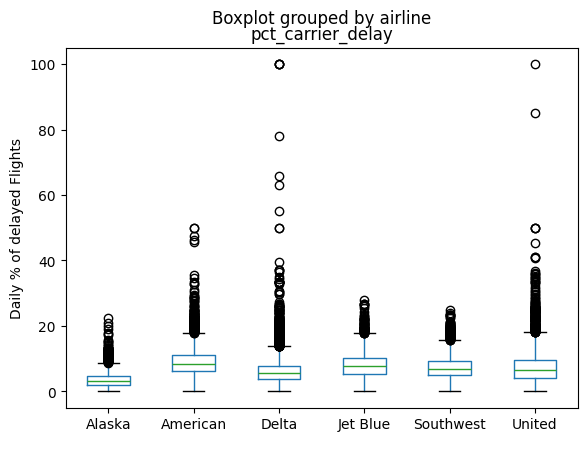

In [ ]:
ax = airline_stats.boxplot(by = "airline" , column = "pct_carrier_delay" , 
                           grid=False)
ax.set_xlabel(" ")
ax.set_ylabel('Daily % of delayed Flights')


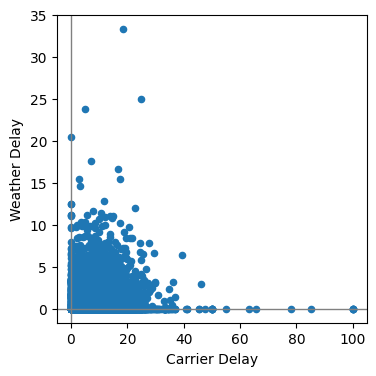

In [51]:
ax = airline_stats.plot.scatter(x  = "pct_carrier_delay" , 
                                y = "pct_weather_delay" , 
                                figsize = (4 , 4)  
                                )
ax.set_xlabel("Carrier Delay")
ax.set_ylabel("Weather Delay")
ax.axhline(0 , color = 'gray' , lw = 1)
ax.axvline(0 , color = 'gray' , lw = 1)

Text(0, 0.5, 'Daily % of Delayed Flights')

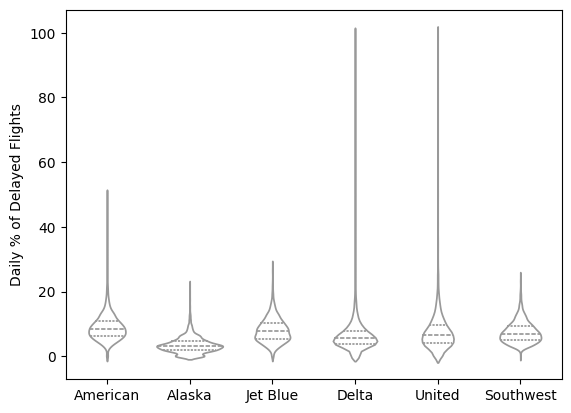

In [53]:
ax = sns.violinplot(x = airline_stats.airline , 
                    y = airline_stats.pct_carrier_delay , 
                    inner = "quartile" , color = "white")
ax.set_xlabel('')
ax.set_ylabel("Daily % of Delayed Flights")